In [2]:
using GraphPlot: gplot, circular_layout

In [3]:
include("data_graph.jl")

Main.MyDataGraph

In [8]:
# Actually this works! Got it from:
# https://discourse.julialang.org/t/re-importing-modules-with-changes-in-the-code/9192/4
Revise.track("data_graph.jl")

In [4]:
using .MyDataGraph

In [5]:
gen_graphs_hard

gen_graphs_hard (generic function with 1 method)

In [6]:
graphs = gen_graphs_hard(DataSpec(d=10, k=1, gtype=:ER,
                                      noise=:Gaussian))[1:11]

generating graph..100%|█████████████████████████████████| Time: 0:00:01


11-element Array{Any,1}:
 {10, 10} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 10} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 10} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 10} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 10} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 8} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 10} directed I

In [7]:
g = graphs[1]

{10, 10} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [7]:
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

LoadError: UndefVarError: nv not defined

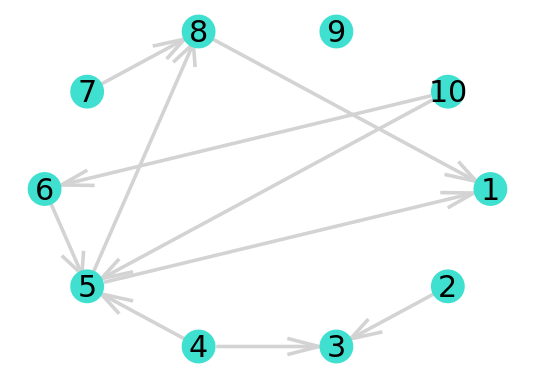

In [12]:
myplot(g)

# Seeding and deterministic graph generation

- set seeding before generation of each size/type graph
- compare if they are same, across machines
- give it a special filename with seeds used

In [1]:
include("data_graph.jl")

gen_graphs_hard (generic function with 1 method)

In [2]:
spec = DataSpec(d=10, k=1, gtype=:SF, noise=:Gaussian, mechanism=:Linear, mat=:COR)

DataSpec(10, 1, :SF, :Gaussian, :COR, :Linear, 3000, 3, 128)

In [4]:
ds, test_ds = load_sup_ds(spec, spec.bsize)

(DataSetIterator:
  batch size: 128
  number of batches: 56
  x data shape: (10, 10, 7200)
  y data shape: (10, 10, 7200)
  current index: 1, DataSetIterator:
  batch size: 128
  number of batches: 14
  x data shape: (10, 10, 1803)
  y data shape: (10, 10, 1803)
  current index: 1)

In [6]:
x, y = next_batch!(ds)

([1.0 0.4326155430430755 … -0.08024058330398617 0.011021231516287517; 0.4326155430430755 1.0 … -0.26157685380363394 -0.45432838329453573; … ; -0.08024058330398617 -0.26157685380363394 … 1.0 -0.01621772973591806; 0.011021231516287517 -0.45432838329453573 … -0.01621772973591806 1.0]

[1.0 -0.7174186164430301 … -0.5210941938426015 -0.9554107686674934; -0.7174186164430301 1.0 … 0.7446005717562386 0.6860140439071812; … ; -0.5210941938426015 0.7446005717562386 … 1.0 0.5016799383498483; -0.9554107686674934 0.6860140439071812 … 0.5016799383498483 1.0]

[1.0 0.711239548145396 … -0.23777657838765334 0.6354056770418054; 0.711239548145396 1.0 … -0.32909696985186393 0.8921791069704046; … ; -0.23777657838765334 -0.32909696985186393 … 1.0 -0.287448207729052; 0.6354056770418054 0.8921791069704046 … -0.287448207729052 1.0]

...

[1.0 0.5919454015133351 … 0.23960108052082418 0.5058821602826491; 0.5919454015133351 1.0 … 0.03771140680683814 0.8521228710119598; … ; 0.23960108052082418 0.03771140680683814 …

In [12]:
@show size(x)
@show size(y)

size(x) = (10, 10, 128)
size(y) = (10, 10, 128)


(10, 10, 128)

In [13]:
# generating graphs
graphs = gen_graphs_hard(spec)

generating graph..100%|█████████████████████████████████| Time: 0:00:01


3000-element Array{Any,1}:
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)
 {10, 9} directed Int64

In [14]:
size(graphs)

(3000,)

In [15]:
graphs[1]

{10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

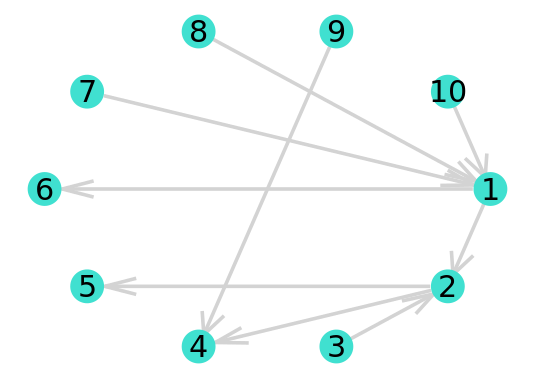

In [16]:
myplot(graphs[1])

generating graph..100%|█████████████████████████████████| Time: 0:00:00


graphs[1] = {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)


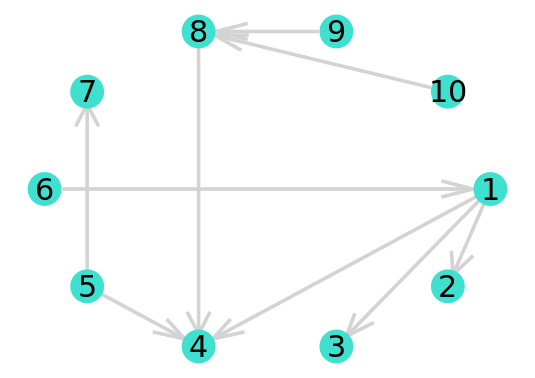

In [18]:
# it is different for different runs
graphs = gen_graphs_hard(spec)
@show graphs[1]
myplot(graphs[1])

generating graph..100%|█████████████████████████████████| Time: 0:00:00


graphs[1] = {10, 9} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)


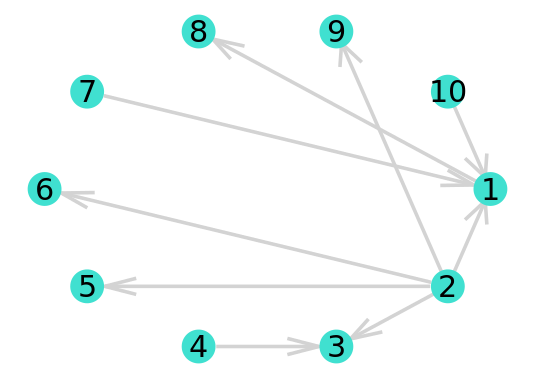

In [24]:
# set seeding
Random.seed!(1234)
# it is different for different runs
graphs = gen_graphs_hard(spec)
@show graphs[1]
myplot(graphs[1])